In [1]:
%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
load_dotenv()

import multimodal_api

In [10]:
from pydantic import BaseModel

class Test(BaseModel):
    text: str

test = Test(text="1")
getattr(test, "text", "") 

'1'

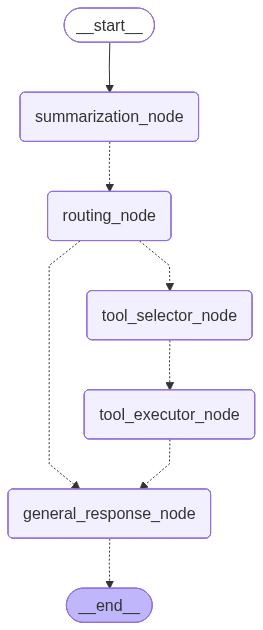

In [2]:
from multimodal_api.agent.graph import AIAgent
from IPython.display import display, Image

ai_agent = AIAgent()

display(Image(ai_agent._graph.get_graph().draw_mermaid_png()))


In [3]:
import asyncio
from langgraph.runtime import Runtime
from langchain_core.messages import HumanMessage
from langchain_core.runnables import RunnableConfig

from multimodal_api.agent.mcp_client import get_mcp_client
from multimodal_api.agent.state import VideoAgentState, Context

from multimodal_api.agent.service import ainvoke_agent, astream_agent

In [4]:
from multimodal_api.agent.service import ainvoke_agent

config = {"configurable": {"thread_id": "1"}}

input_data={"messages": "show the clip with the sad robot",
           "image_base64": None}
context={"mcp_client":get_mcp_client()}

result = await ainvoke_agent(agent=ai_agent, input=input_data, context=context, config=config)

print(result)

2025-11-03 16:12:24.630 | INFO     | multimodal_api.agent.service:ainvoke_agent:33 - Invoking agent...
2025-11-03 16:12:24.719 | INFO     | multimodal_api.agent.nodes.summarizer:summarization_node:28 - Summarization node invoked. Message count: 1
2025-11-03 16:12:24.719 | INFO     | multimodal_api.agent.nodes.summarizer:summarization_node:38 - Token threshold not reached. Skipping summarization.
2025-11-03 16:12:24.736 | INFO     | multimodal_api.agent.nodes.router:routing_node:48 - Routing node invoked. Last message: show the clip with the sad robot
2025-11-03 16:12:27.172 | DEBUG    | multimodal_api.agent.nodes.router:routing_node:70 - Routing decision: {"use_tool":"True"}
2025-11-03 16:12:27.172 | INFO     | multimodal_api.agent.nodes.router:routing_node:74 - Token usage: 896
2025-11-03 16:12:27.172 | SUCCESS  | multimodal_api.agent.nodes.router:routing_node:79 - Routing to: tool_selector_node
2025-11-03 16:12:27.187 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selecto

Here’s the clip you asked for:  

**videos/ai_responses/eccbcc46-4020-43cc-9844-5ebdc93b48f2.mp4**

Play it, and let the melancholy of the robot remind you that even in a world of algorithms, there’s still room for a touch of existential sorrow. Enjoy.
message='Here’s the clip you asked for:  \n\n**videos/ai_responses/eccbcc46-4020-43cc-9844-5ebdc93b48f2.mp4**\n\nPlay it, and let the melancholy of the robot remind you that even in a world of algorithms, there’s still room for a touch of existential sorrow. Enjoy.' video_clip_path='videos/ai_responses/eccbcc46-4020-43cc-9844-5ebdc93b48f2.mp4'


In [6]:
from multimodal_api.agent.service import ainvoke_agent

config = {"configurable": {"thread_id": "1"}}

input_data={"messages": "scene from interstellar movie?",
           "image_base64": None}
context={"mcp_client":get_mcp_client()}

result = await ainvoke_agent(agent=ai_agent, input=input_data, context=context, config=config)

print(result)

2025-11-03 15:27:16.009 | INFO     | multimodal_api.agent.service:ainvoke_agent:33 - Invoking agent...
2025-11-03 15:27:16.023 | INFO     | multimodal_api.agent.nodes.summarizer:summarization_node:36 - Summarization node invoked. Message count: 4
2025-11-03 15:27:16.025 | INFO     | multimodal_api.agent.nodes.router:routing_node:52 - Routing node invoked. Last user message: scene from interstellar movie?
2025-11-03 15:27:18.239 | DEBUG    | multimodal_api.agent.nodes.router:routing_node:80 - Model output: {"use_tool":"True"}
2025-11-03 15:27:18.239 | INFO     | multimodal_api.agent.nodes.router:routing_node:85 - Routing node token usage: (total=2632)
2025-11-03 15:27:18.239 | SUCCESS  | multimodal_api.agent.nodes.router:routing_node:90 - Routing decision: use_tool=True → tool_selector_node
2025-11-03 15:27:18.242 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:42 - Tool selector invoked. Last message: scene from interstellar movie?
2025-11-03 15:27:21.108 | DEB

True
message='True' video_clip_path='videos/ai_responses/31496c0d-002b-4909-8e4f-d5be68ed1ded.mp4'


In [5]:
from multimodal_api.agent.service import astream_agent

config = {"configurable": {"thread_id": "2"}}

input_data={"messages": "show me the dinner scene"}
context={"mcp_client":get_mcp_client()}

class DummyWebSocket:
    async def send_json(self, data):
        print("STREAM EVENT:", data)

dummy_ws = DummyWebSocket()

await astream_agent(
    agent=ai_agent,
    input=input_data,
    context=context,
    config=config,
    websocket=dummy_ws,
)


2025-10-31 19:34:21.147 | INFO     | multimodal_api.agent.service:astream_agent:36 - Streaming agent output...
2025-10-31 19:34:21.150 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:42 - Tool selector invoked. Last user message: show me the dinner scene
2025-10-31 19:34:24.140 | DEBUG    | multimodal_api.agent.nodes.tool_selector:tool_selector_node:88 - Tool selector output (ToolCall): {'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"show me the dinner scene"}'}
2025-10-31 19:34:24.140 | SUCCESS  | multimodal_api.agent.nodes.tool_selector:tool_selector_node:89 - Tool chosen: get_video_clip_from_user_query
2025-10-31 19:34:24.156 | INFO     | multimodal_api.agent.nodes.tool_selector:tool_selector_node:94 - Tool Selector node token usage: (total=739)
2025-10-31 19:34:24.159 | INFO     | multimodal_api.agent.nodes.tool_executor:tool_executor_node:37 - tool_executor_node invoked. Last user message: 
2025-10-31 19:34:24.160 | INFO     | 

{'tool_name': 'get_video_clip_from_user_query', 'tool_args': '{"user_query":"show me the dinner scene"}'}


2025-10-31 19:34:30.873 | SUCCESS  | multimodal_api.agent.nodes.tool_executor:tool_executor_node:99 - Tool 'get_video_clip_from_user_query' executed successfully. Result: ././shared_media/617c3946-b0ed-4721-b6fd-0750a9a08c4a.mp4


STREAM EVENT: {'status': 'complete'}
